In [63]:
# ! pip install yfinance
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,3,3)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
# 2x leveraged nasdaq 100 etf
qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)
# 3x leveraged nasdaq 100 etf
tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)
#nasdaq 100 index
ndx = ab.StockData('NDX')
ndx.get_data_from_yfinance('NDX', sd, ed)
#S&P 500 etf
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)
#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
#buy and hold strategy vs various  strategies
def backtestAll(ticker:ab.StockData,test_start:dt.datetime,test_end:dt.datetime, verbose = True):
    perf_summary = pd.DataFrame()
    buy_and_hold = ab.BuyAndHold() 
    buy_and_hold.run_strategy(ticker, test_start,test_end)
    bt = ab.BackTest(test_start, test_end)
    bt.run_backtest(buy_and_hold, ticker)

    macross_strategy = ab.MACross(50, 200)
    macross_strategy.run_strategy(ticker, test_start ,test_end)
    ma_cross_bt = ab.BackTest(test_start, test_end)
    ma_cross_bt.run_backtest(macross_strategy, ticker)

    threshold_strategy = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
    threshold_strategy.run_strategy(ticker, test_start , test_end)
    naa200r_threshold_bt = ab.BackTest(test_start , test_end)
    naa200r_threshold_bt.run_backtest(threshold_strategy, ticker)

    ma_threshold = ab.MAThreshold(ma_window = 200, buy_threshold = 1.05, sell_threshold = 0.95)
    ma_threshold.run_strategy(ticker, test_start,test_end)
    ma_threshold_bt = ab.BackTest(test_start, test_end)
    ma_threshold_bt.run_backtest(ma_threshold, ticker)

    ma_threshold2 = ab.MAThreshold(ma_window = 200, buy_threshold = 1.03, sell_threshold = 0.95)
    ma_threshold2.run_strategy(ticker, test_start,test_end)
    ma_threshold2_bt = ab.BackTest(test_start, test_end)
    ma_threshold2_bt.run_backtest(ma_threshold2, ticker)
    
    WeeklyMAThreshold = ab.WeeklyMAThreshold(ma_window =40,buy_threshold=1,sell_threshold=1)
    WeeklyMAThreshold.run_strategy(ticker, test_start , test_end)
    WeeklyMAThreshold_bt = ab.BackTest(test_start , test_end)
    WeeklyMAThreshold_bt.run_backtest(WeeklyMAThreshold, ticker)

    print('Backtest for', ticker.ticker)
    bt.performance_summary('Buy and Hold', verbose = verbose)
    ma_cross_bt.performance_summary('MA Crossing, 50, 200', verbose = verbose)
    naa200r_threshold_bt.performance_summary('NAA200R, 15, 30', verbose = verbose)
    ma_threshold_bt.performance_summary('Price to SMA 200, 5% BUY, -5% SELL', verbose = verbose)
    ma_threshold2_bt.performance_summary('Price to SMA 200, 3% BUY, -5% SELL', verbose = verbose)
    WeeklyMAThreshold_bt.performance_summary('Weekley Price to SMA 200, 2w higher BUY, 2w lower SELL', verbose = verbose)
    
    fig = plt.figure(figsize=(16,4))
    plt.plot(bt.balance['Date'], bt.balance['Total'], label = 'Buy and Hold',color = 'blue')
    plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'], label = 'Moving Average Cross', color = 'red')
    plt.plot(naa200r_threshold_bt.balance['Date'], naa200r_threshold_bt.balance['Total'], label = 'NAA200R', color = 'green')
    plt.plot(ma_threshold_bt.balance['Date'], ma_threshold_bt.balance['Total'], label = 'Price to SMA200, 5% Buy, -5% Sell')
    plt.plot(ma_threshold2_bt.balance['Date'], ma_threshold2_bt.balance['Total'], label = 'Price to SMA200, 3% Buy, -5% Sell')
    plt.plot(WeeklyMAThreshold_bt.balance['Date'], WeeklyMAThreshold_bt.balance['Total'], label = 'Weekley Price to SMA 200, 2w higher BUY, 2w lower SELL')
 
    plt.legend()
    plt.title('Backtesting for {}'.format(ticker.ticker))
    plt.show()


    for strategy in [bt,ma_cross_bt,naa200r_threshold_bt, ma_threshold_bt, ma_threshold2_bt, WeeklyMAThreshold_bt]:
        perf_summary = pd.concat([perf_summary, strategy.summary_result])
        
    return perf_summary


Backtest for QQQ


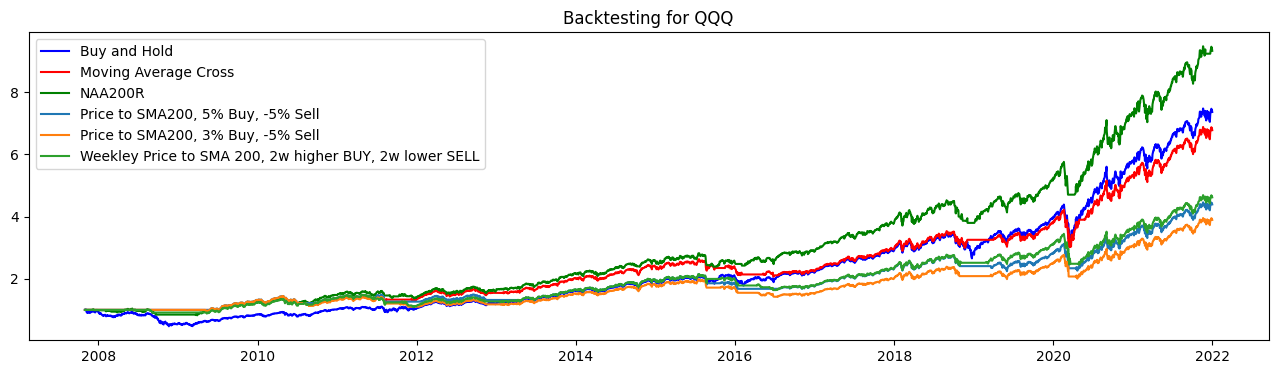

,strategy_name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,6.367593,0.092156,-0.513514,0.047100,0.000658,0.013968,5174
0,"MA Crossing, 50, 200",10,5.782132,0.087151,-0.285594,0.055571,0.000594,0.010696,5174
0,"NAA200R, 15, 30",30,8.334542,0.106245,-0.209116,0.065622,0.000681,0.010370,5174
0,"Price to SMA 200, 5% BUY, -5% SELL",9,3.393667,0.059912,-0.276368,0.048443,0.000461,0.009508,5174
0,"Price to SMA 200, 3% BUY, -5% SELL",12,2.895502,0.051930,-0.284460,0.043669,0.000430,0.009851,5174
0,"Weekley Price to SMA 200, 2w higher BUY, 2w lo...",15,3.622057,0.063205,-0.287568,0.046459,0.000484,0.010417,5174


In [12]:
test_start = dt.datetime(2007,11,1) # dt.datetime(2003,3,10)
test_end = dt.datetime(2021,12,31)

perf_summary = backtestAll(qqq, test_start, test_end, verbose = False)
display(perf_summary)

Backtest for QLD


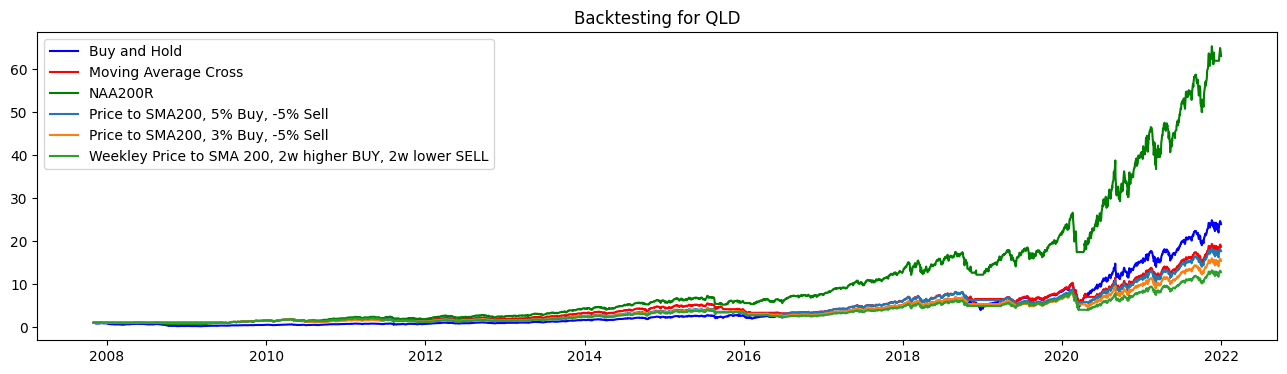

,strategy_name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,22.978450,0.160980,-0.812301,0.046076,0.001279,0.027763,5174
0,"MA Crossing, 50, 200",10,17.671631,0.146553,-0.517154,0.049847,0.001042,0.020905,5174
0,"NAA200R, 15, 30",30,62.121676,0.217286,-0.357239,0.067067,0.001374,0.020494,5174
0,"Price to SMA 200, 5% BUY, -5% SELL",12,16.655417,0.143324,-0.381837,0.053430,0.000973,0.018202,5174
0,"Price to SMA 200, 3% BUY, -5% SELL",16,14.406846,0.135455,-0.419595,0.050699,0.000941,0.018559,5174
0,"Weekley Price to SMA 200, 2w higher BUY, 2w lo...",14,11.758877,0.124527,-0.528689,0.045457,0.000924,0.020325,5174


In [9]:
perf_summary = backtestAll(qld, test_start, test_end, verbose = False)
display(perf_summary)

Backtest for TQQQ


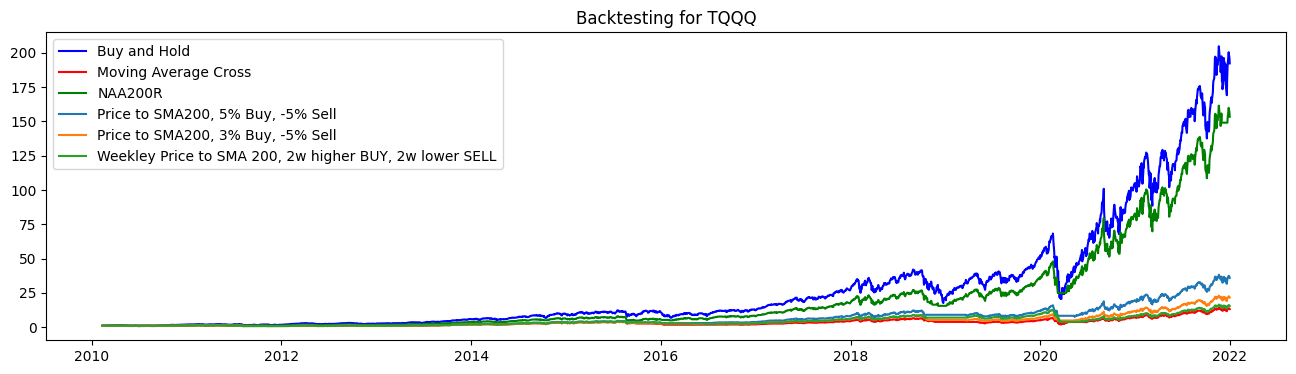

,strategy_name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,191.265899,0.284250,-0.699221,0.066872,0.002429,0.036325,5174
0,"MA Crossing, 50, 200",8,12.200461,0.126503,-0.699221,0.043527,0.001363,0.031323,5174
0,"NAA200R, 15, 30",21,152.380861,0.270425,-0.481365,0.070598,0.002154,0.030514,5174
0,"Price to SMA 200, 5% BUY, -5% SELL",10,34.896155,0.184311,-0.530692,0.058446,0.001557,0.026638,5174
0,"Price to SMA 200, 3% BUY, -5% SELL",15,20.578188,0.154897,-0.519020,0.051752,0.001396,0.026983,5174
0,"Weekley Price to SMA 200, 2w higher BUY, 2w lo...",11,14.441445,0.135585,-0.699221,0.046118,0.001366,0.029626,5174


In [10]:
perf_summary = backtestAll(tqqq, test_start, test_end, verbose = False)
display(perf_summary)

Backtest for SPY


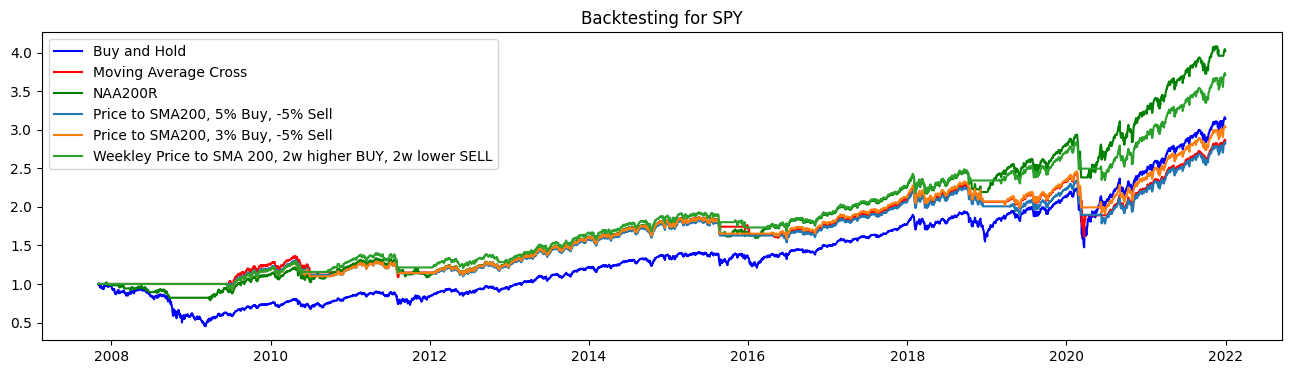

,strategy_name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,2.144806,0.037004,-0.523873,0.031319,0.000405,0.012935,5174
0,"MA Crossing, 50, 200",8,1.857268,0.029920,-0.341047,0.038176,0.000333,0.008713,5174
0,"NAA200R, 15, 30",30,3.023883,0.054105,-0.198777,0.048466,0.000430,0.008873,5174
0,"Price to SMA 200, 5% BUY, -5% SELL",7,1.822156,0.028985,-0.238444,0.042387,0.000320,0.007539,5174
0,"Price to SMA 200, 3% BUY, -5% SELL",7,2.034431,0.034398,-0.220977,0.044378,0.000341,0.007684,5174
0,"Weekley Price to SMA 200, 2w higher BUY, 2w lo...",9,2.714168,0.048695,-0.177160,0.051857,0.000398,0.007666,5174


In [11]:
perf_summary = backtestAll(spy, test_start, test_end, verbose = False)
display(perf_summary)

In [41]:
test_start,test_end = dt.datetime(2016,1,1), dt.datetime(2023,3,3)

ffty = ab.StockData('FFTY')
ffty.get_data_from_yfinance('FFTY', sd, ed)
ffty.get_indicators()

import numpy as np
signals_df = ffty.data.copy()
signals_df['Signal'] = np.where(signals_df.price_to_MA200 < 0.95, -1, 
                                np.where(signals_df.price_to_MA200 > 1.05, 1, 0))
signals_df = signals_df.loc[signals_df.Signal!=0, ['Signal']]

[*********************100%***********************]  1 of 1 completed


In [64]:
ffty = ab.StockData('FFTY')
ffty.get_data_from_yfinance('FFTY', sd, ed)
ffty.get_indicators()

ffty_signals_df = ffty.data.copy()
ffty_signals_df['Signal'] = np.where(ffty_signals_df.price_to_MA200 < 0.95, -1, np.where(ffty_signals_df.price_to_MA200 > 1.03, 1, 0))
# ffty_signals_df = ffty_signals_df.loc[ffty_signals_df.Signal!=0, ['Signal']]
ffty_signals_df = ffty_signals_df[['Signal']]

[*********************100%***********************]  1 of 1 completed


In [100]:
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)
spy.get_indicators()
spy.data['new_high'] = spy.data['Close'].cummax()
spy.data['off_new_high'] = spy.data['Close'] / spy.data['new_high'] - 1
spy.data['max_off_new_high'] = spy.data['off_new_high'].rolling(252).min()
spy.data['Close_prev_week'] = spy.data['Close'].shift(14)
spy.data['price_to_MA200_prev_week'] = spy.data['price_to_MA200'].shift(14)

spy_signals_df = spy.data.copy()
# buy rule: two consecutive days of above 200 AND previously SPY DOWN 20%
buy_rule = (spy_signals_df['max_off_new_high']< - 0.2) & (spy_signals_df['price_to_MA200'] > 1.05) & (spy_signals_df['price_to_MA200_prev_week'] > 1.05)
spy_signals_df['Signal'] = np.where(buy_rule, 1, 0)
spy_signals_df = spy_signals_df[['Signal']]#.loc[spy_signals_df.Signal!=0]#, ['Signal']]

[*********************100%***********************]  1 of 1 completed


In [101]:

spy.data[test_start:ed]

,Open,High,Low,Close,Adj Close,Volume,MA5,price_to_MA5,MA10,price_to_MA10,...,price_to_MA50,MA200,price_to_MA200,below30,above15,new_high,off_new_high,max_off_new_high,Close_prev_week,price_to_MA200_prev_week
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,177.237350,222353500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,201.020004,0.000000,NaN,NaN,NaN
2016-01-05,201.399994,201.899994,200.050003,201.360001,177.537170,110845800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,201.360001,0.000000,NaN,NaN,NaN
2016-01-06,198.339996,200.059998,197.600006,198.820007,175.297684,152112600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,201.360001,-0.012614,NaN,NaN,NaN
2016-01-07,195.330002,197.440002,193.589996,194.050003,171.091995,213436100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,201.360001,-0.036303,NaN,NaN,NaN
2016-01-08,195.190002,195.850006,191.580002,191.919998,169.214020,209817200,197.434003,0.972072,NaN,NaN,...,NaN,NaN,NaN,0,1,201.360001,-0.046881,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,399.519989,401.130005,397.019989,398.540009,398.540009,83742300,405.430005,0.983006,407.840002,0.977197,...,1.004480,393.182750,1.013625,0,1,477.709991,-0.165728,-0.253606,410.799988,1.041698
2023-02-23,401.559998,402.200012,396.250000,400.660004,400.660004,96242400,402.766003,0.994771,406.841003,0.984807,...,1.009448,393.129350,1.019156,0,1,477.709991,-0.161290,-0.253606,416.779999,1.057146
2023-02-24,395.420013,397.250000,393.640015,396.380005,396.380005,108194400,400.386005,0.989995,405.770004,0.976859,...,0.998794,393.120400,1.008292,0,1,477.709991,-0.170250,-0.253606,412.350006,1.046343


In [90]:
# ffty_signals_df['Signal'] 
signals_df = ffty_signals_df.rename(columns={'Signal':'FFTY_Signal'}).join(spy_signals_df.rename(columns={'Signal':'SPY_Signal'}), how='outer')
signals_df['Signal']= np.where((signals_df['SPY_Signal']==1)|(signals_df['FFTY_Signal']==1), 1, np.where(signals_df['FFTY_Signal']==-1, -1, 0))
# signals_df = signals_df.loc[(signals_df.index>='2016-01-01')]#&(signals_df.index.dayofweek ==4)]# , ['Signal']].copy()

<Axes: xlabel='Date'>

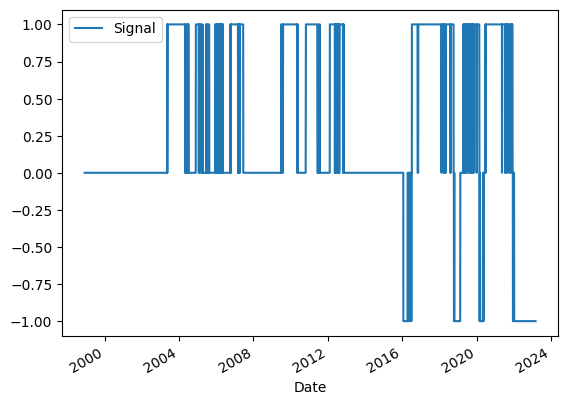

In [69]:
# signals_df[['Signal','FFTY_Signal','SPY_Signal']].plot()

signals_df[['Signal']].plot()

In [92]:
ticker = qqq
test_start,test_end = dt.datetime(2016,1,1), dt.datetime(2023,3,3)

mystrategy = ab.CustomizedStrategy(signals_df = signals_df)
mystrategy.run_strategy(ticker, test_start,test_end)
mystrategy_bt = ab.BackTest(test_start, test_end)
mystrategy_bt.run_backtest(mystrategy, ticker)
mystrategy_bt.performance_summary('FFTY+SPY')


        
        Performance Summary of FFTY+SPY: 
        cumulative return:177.95%, 
        sharp_ratio: 7.04%, 
        max_drawdown: -15.65%, 
        average of daily return:0.0604%, 
        std of daily return: 0.8588%,
        number of trades: 4,
        trading days: 2618,
        annual return: 5.9326%

        
        


In [56]:
df_balance = mystrategy_bt.balance
df_balance['Trade'] = np.where(df_balance['Stock'].diff()>0, 1, np.where(df_balance['Stock'].diff()<0, -1, 0))
df_balance.loc[df_balance.Trade!=0]

,Date,Cash,Stock,Total,Margin,Trade
129,2016-07-08,0.000000,0.009066,1.000000,0,1
698,2018-10-10,1.556936,0.000000,1.556936,0,-1
822,2019-04-10,0.000000,0.008395,1.556936,0,1
1044,2020-02-27,1.726253,0.000000,1.726253,0,-1
1121,2020-06-17,0.000000,0.007086,1.726253,0,1
1497,2021-12-13,2.779493,0.000000,2.779493,0,-1


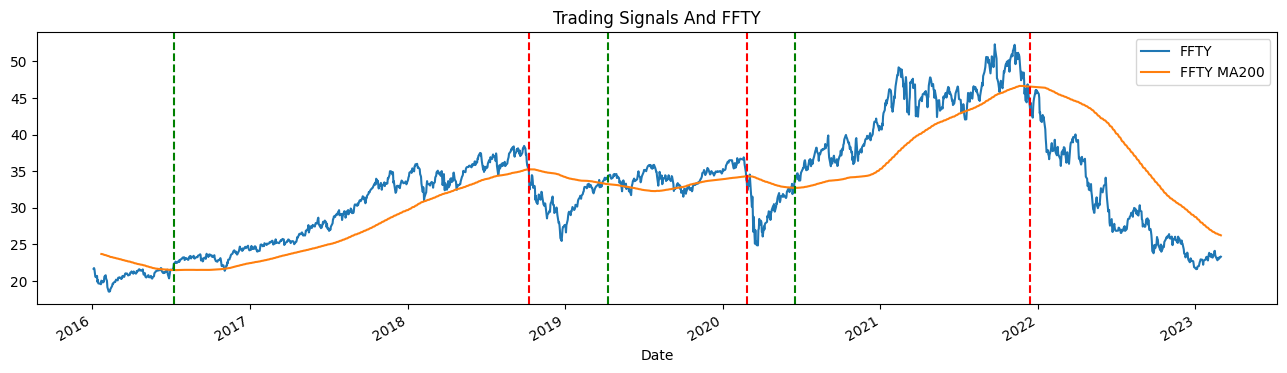

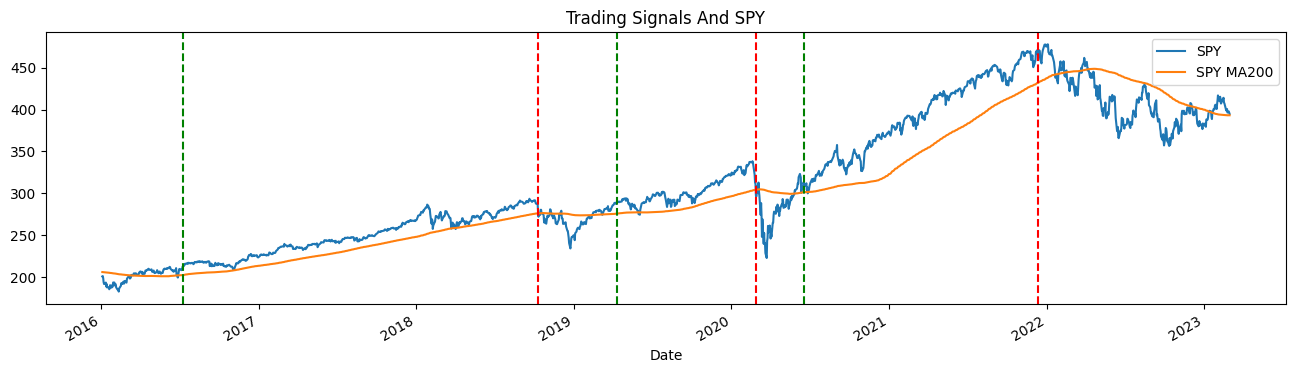

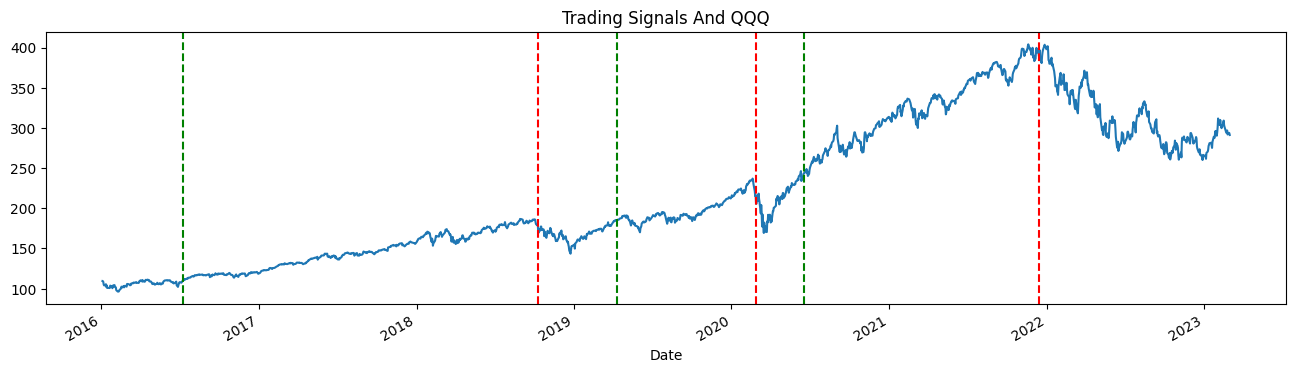

<Figure size 1600x400 with 0 Axes>

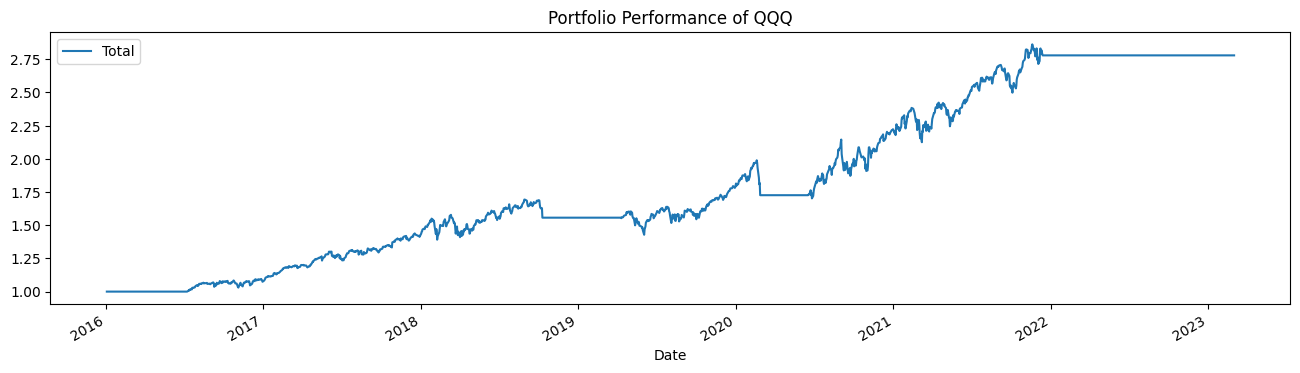

In [99]:
ticker = qqq
sd, ed = dt.datetime(2016,1,1), dt.datetime(2023,3,1)
signal_ma_window = 200
visualization = True

ffty_data = ffty.data.sort_index().loc[sd:ed].copy()
spy_data = spy.data.sort_index().loc[sd:ed].copy()

ticker_data = ticker.data.sort_index().loc[sd:ed].copy()
ticker_name = ticker.ticker


    
if visualization == True:
    
    # get trade list

    df_balance = mystrategy_bt.balance
    df_balance['Trade'] = np.where(df_balance['Stock'].diff()>0, 1, np.where(df_balance['Stock'].diff()<0, -1, 0))

    # plots
    fig = plt.figure(figsize=(16,4))
    ffty_data['Close'].plot(label='FFTY')
    ffty_data['MA'+str(signal_ma_window)].plot(label='FFTY MA{}'.format(signal_ma_window))

    trades = df_balance.loc[df_balance['Trade']!=0]
    for idx, row in trades.iterrows():
        if row['Trade']<0:
            plt.axvline(x=row.Date, color = 'red', linestyle='dashed') 
        if row['Trade']>0:
            plt.axvline(x=row.Date, color = 'green', linestyle='dashed') 

    # plt.ylim([0, 50])
    plt.title('Trading Signals And FFTY')
    plt.legend()
    plt.show()

    fig = plt.figure(figsize=(16,4))
    spy_data['Close'].plot(label='SPY')
    spy_data['MA'+str(signal_ma_window)].plot(label='SPY MA{}'.format(signal_ma_window))

    trades = df_balance.loc[df_balance['Trade']!=0]
    for idx, row in trades.iterrows():
        if row['Trade']<0:
            plt.axvline(x=row.Date, color = 'red', linestyle='dashed') 
        if row['Trade']>0:
            plt.axvline(x=row.Date, color = 'green', linestyle='dashed') 

    # plt.ylim([0, 50])
    plt.title('Trading Signals And SPY')
    plt.legend()
    plt.show()

    fig = plt.figure(figsize=(16,4))
    ticker_data['Close'].plot()

    trades = df_balance.loc[df_balance['Trade']!=0]
    for idx, row in trades.iterrows():
        if row['Trade']<0:
            plt.axvline(x=row.Date, color = 'red', linestyle='dashed') 
        if row['Trade']>0:
            plt.axvline(x=row.Date, color = 'green', linestyle='dashed') 
    plt.title('Trading Signals And {}'.format(ticker_name))
    plt.show()

    fig = plt.figure(figsize=(16,4))
    df_balance.plot(x = 'Date', y = 'Total', title = 'Portfolio Performance of {}'.format(ticker_name), figsize=(16,4))

In [51]:
threshold_strategy = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
threshold_strategy.run_strategy(ticker, test_start , test_end)
naa200r_threshold_bt = ab.BackTest(test_start , test_end)
naa200r_threshold_bt.run_backtest(threshold_strategy, ticker)
naa200r_threshold_bt.performance_summary('NAA200R')

ma_threshold = ab.MAThreshold(ma_window = 200, buy_threshold = 1.05, sell_threshold = 0.95)
ma_threshold.run_strategy(ticker, test_start,test_end)
ma_threshold_bt = ab.BackTest(test_start, test_end)
ma_threshold_bt.run_backtest(ma_threshold, ticker)
ma_threshold_bt.performance_summary('SMA200')


        
        Performance Summary of NAA200R: 
        cumulative return:244.40%, 
        sharp_ratio: 6.57%, 
        max_drawdown: -23.33%, 
        average of daily return:0.0752%, 
        std of daily return: 1.1440%,
        number of trades: 18,
        trading days: 2618,
        annual return: 9.3480%

        
        

        
        Performance Summary of SMA200: 
        cumulative return:108.22%, 
        sharp_ratio: 4.53%, 
        max_drawdown: -27.64%, 
        average of daily return:0.0459%, 
        std of daily return: 1.0130%,
        number of trades: 5,
        trading days: 2618,
        annual return: 0.7932%

        
        
